In [2]:
# selenium syntax
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import requests
import time, os
# selenium syntax

from collections import OrderedDict
import pickle

# basic linear regression syntax
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
# basic linear regression syntax

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set() #sets to default visualizations


with open('set1-SF','rb') as read_file:
    Starbucks_df1 = pickle.load(read_file)

housingdata = pd.read_csv('data_all.csv')

datasummary = housingdata[['City', 'Zip', 'Price', 'Home size', 'Lot size', 'SF time', 'PA time', 'School score', 'Commute time']]

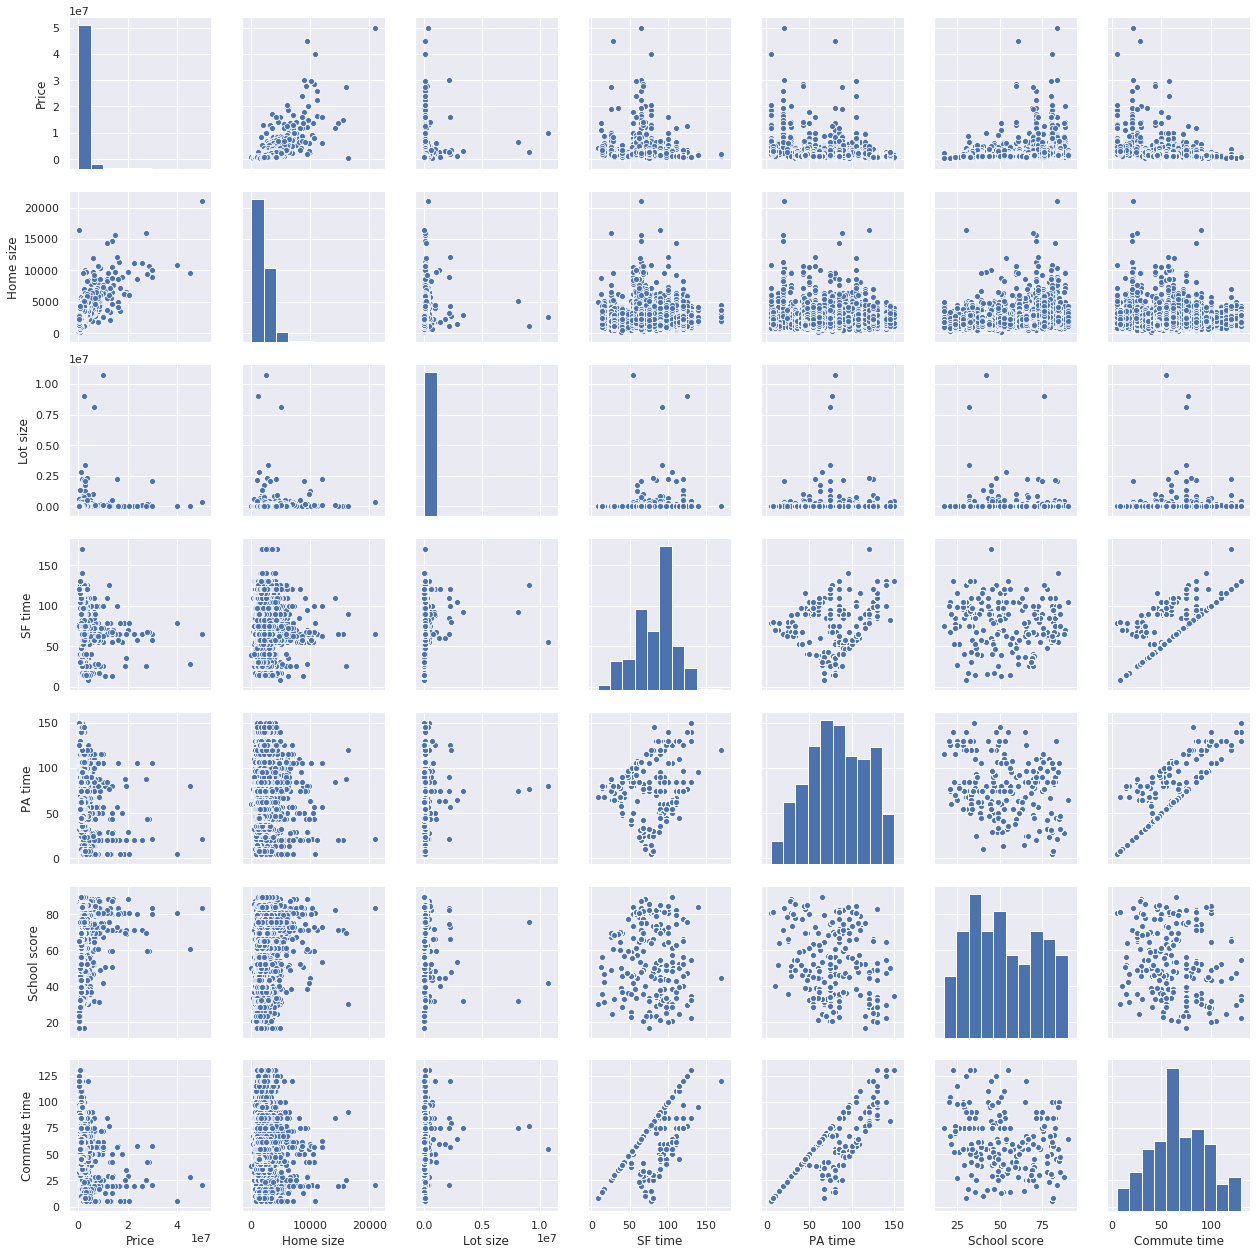

In [2]:
sns.pairplot(data = datasummary)

In [3]:
y = datasummary['Price']
x = datasummary[['Home size', 'Lot size', 'SF time', 'PA time', 'School score', 'Commute time']]


In [62]:
def test_datasets(x,y):
    x_train, x_val, y_train, y_val = \
                train_test_split(x, y, test_size = 0.2, random_state = 42)

    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(x_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(x.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

test_datasets(x, y)


Validation R^2 score was: 0.5602781020463918
Feature coefficient results: 

Home size : 1203.25
Lot size : 0.52
SF time : 8366.05
PA time : 2059.85
School score : 2570.36
Commute time : -30997.49


In [5]:
# #test squaring x
# xsquare = x.copy()
# xsquare['Home squared'] = xsquare['Home size'] **2
# xsquare['Lot squared'] = xsquare['Lot size'] **2
# test_datasets(xsquare, y)


Validation R^2 score was: 0.5460223282331635
Feature coefficient results: 

Home size : 523.47
Lot size : 0.64
SF time : 8427.76
PA time : 3745.56
School score : 9048.09
Commute time : -30593.51
Home squared : 0.07
Lot squared : -0.00


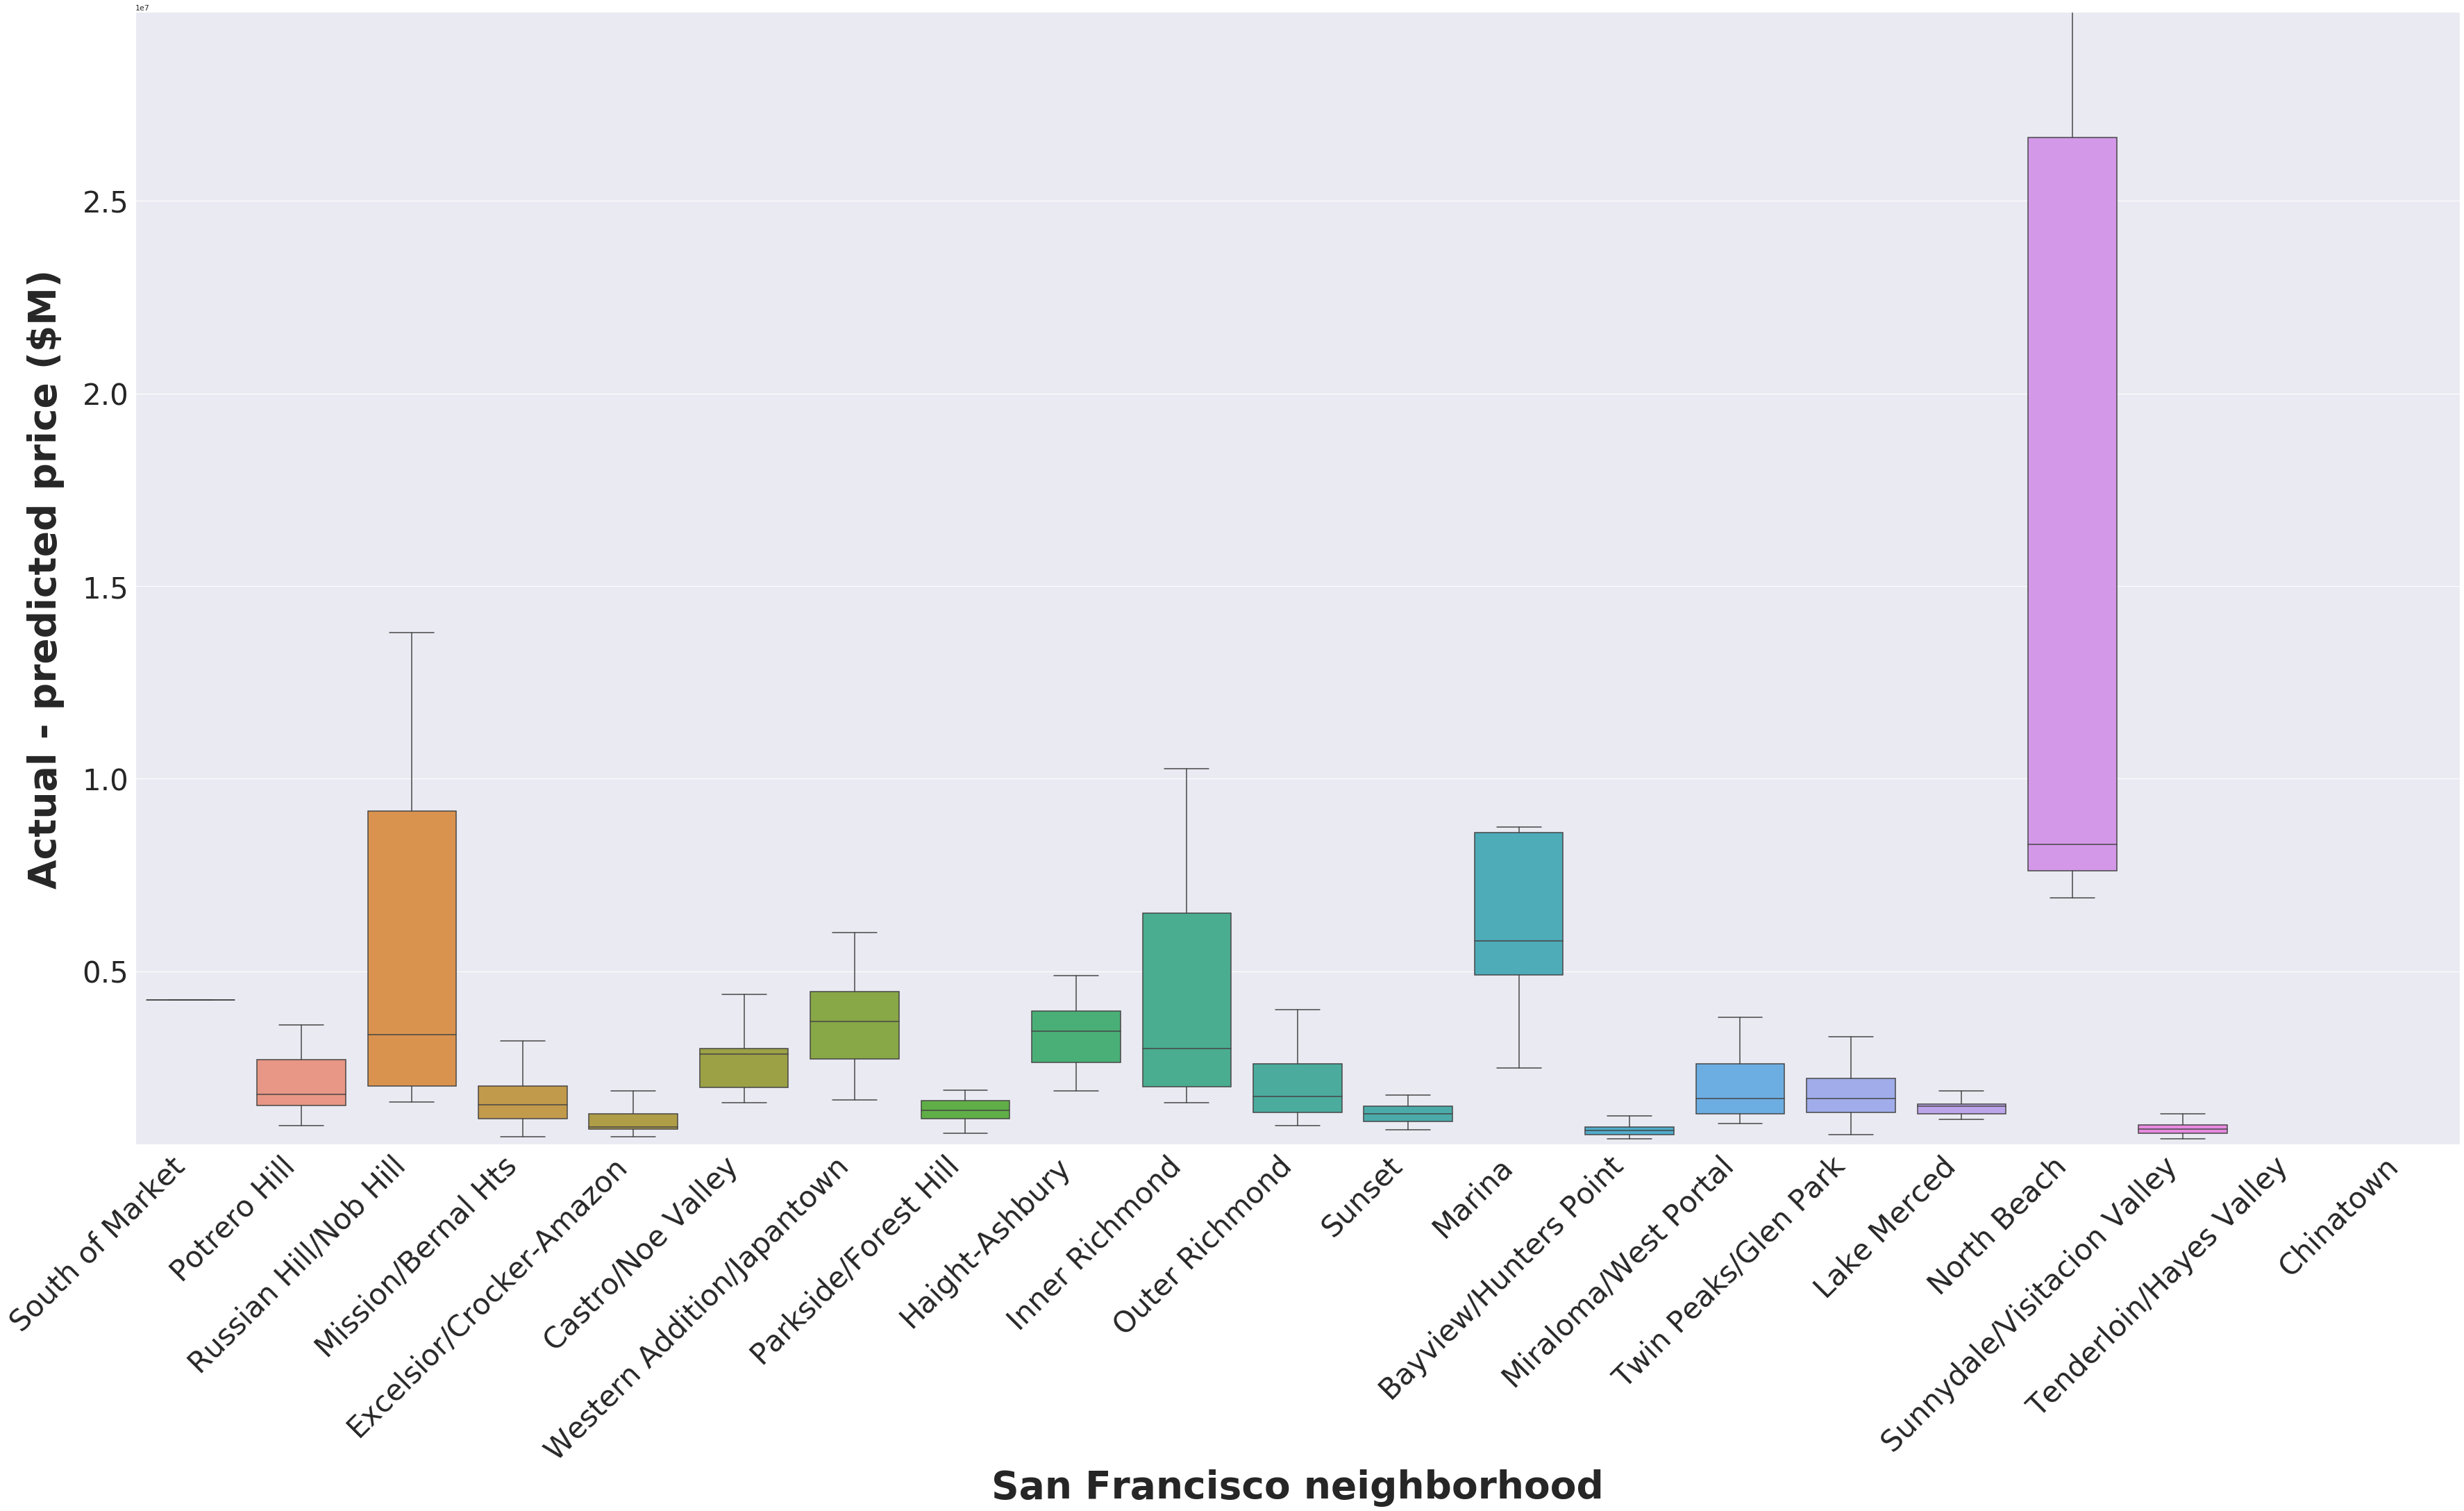

In [6]:
justSF = datasummary
zipnames = pd.read_csv('datafiles/Data/data by zipcode/sf_neighborhoods.csv')
justSF = justSF.merge(zipnames, on = 'Zip', how = 'outer')

ax = plt.subplots(figsize = (60,30)) #to change the area of your subplots

ax = sns.boxplot(x = 'Neighborhood', y = 'Price', data = justSF, \
                 showfliers = False)

plt.xticks(rotation=45, fontname = 'Helvetica', fontsize = 42, ha = 'right')
plt.yticks(fontname = 'Helvetica', fontsize = 42)

plt.xlabel('San Francisco neighborhood', fontsize = 55, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Actual - predicted price ($M)', fontsize = 55, fontname = 'Arial', 
           fontweight = 'bold')

scale = 1000000; ax.set_ylim(500000, 29900000); ax.yaxis.labelpad = 25
# ticks = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/scale))
# ax.xaxis.set_tick_params(width = 3, length = 15)
# ax.yaxis.set_tick_params(width = 3, length = 15)
# ax.yaxis.set_major_formatter(ticks)
# plt.setp(ax.spines.values(), linewidth = 3)